#Analysis of twitter Data using socially connected graphs 

In [ ]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

In [ ]:
#Importing libraries
import networkx as nx
import pandas as pd
from collections import Counter
import colorlover as cl
from IPython.display import HTML
import matplotlib.pyplot as plt 
import numpy as np
import operator
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import math
import collections, functools, operator 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Reading the zip file containing twitter data and opening it 
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [ ]:
df.head()

date        user          tweet
0  2009-06-01 21:43:59  burtonator  No Post Title
1  2009-06-01 21:47:23  burtonator  No Post Title
2  2009-06-02 01:15:44  burtonator  No Post Title
3  2009-06-02 05:17:52  burtonator  No Post Title
4  2009-06-02 23:58:25  burtonator  No Post Title

In [ ]:
#Calculating the no of times a hastag has been used
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
#Printing the most common 150
hashTagsCounter.most_common(150)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75


#Hastag which I will use : **#Video**

In [ ]:
# make a new dataframe just with our hashtag
videoTag = df[df["tweet"].str.lower().str.contains("#video", na=False)].copy()

In [ ]:
#Define a method for adding a mention column
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
addMentionedColumn(videoTag)

In [ ]:
videoTag.head(50)

date  ...                    mentioned
4401    2009-06-11 17:06:21  ...               [360kid, idit]
7339    2009-06-11 17:09:53  ...                           []
7480    2009-06-11 17:10:13  ...                           []
12685   2009-06-11 17:15:32  ...                           []
16387   2009-06-11 17:20:46  ...                           []
27570   2009-06-11 17:38:31  ...                           []
33912   2009-06-11 17:49:41  ...                    [n24_de)]
40310   2009-06-11 17:59:30  ...                           []
42521   2009-06-11 18:02:35  ...                           []
51368   2009-06-11 18:15:38  ...                           []
57558   2009-06-11 18:23:31  ...                           []
59037   2009-06-11 18:24:56  ...                           []
60861   2009-06-11 18:28:18  ...                  [12seconds]
63447   2009-06-11 18:33:34  ...                           []
68903   2009-06-11 18:45:10  ...                           []
73193   2009-06-11 18:51:24  ...                           []
77125   2009-06-11 18:57:28  ...                 [jaycfields]
85690   2009-06-11 19:13:31  ...                           []
88613   2009-06-11 19:17:21  ...                           []
90533   2009-06-11 19:20:02  ...                           []
107694  2009-06-11 19:46:43  ...              [piratenpartei]
108018  2009-06-11 19:47:14  ...  [barefoot_exec, askmrvideo]
110375  2009-06-11 19:50:08  ...              [piratenpartei]
110938  2009-06-11 19:50:45  ...                           []
111350  2009-06-11 19:51:34  ...              [piratenpartei]
116235  2009-06-11 19:58:34  ...                           []
117546  2009-06-11 19:59:46  ...              [piratenpartei]
119380  2009-06-11 20:03:38  ...                           []
124365  2009-06-11 20:17:00  ...                           []
135883  2009-06-11 20:39:02  ...                           []
136868  2009-06-11 20:40:35  ...                           []
138460  2009-06-11 20:42:46  ...              [piratenpartei]
149191  2009-06-11 20:57:43  ...                           []
152380  2009-06-11 21:03:26  ...                           []
153790  2009-06-11 21:06:07  ...                           []
172474  2009-06-11 21:42:40  ...                           []
173072  2009-06-11 21:43:31  ...                           []
176311  2009-06-11 21:48:22  ...                           []
186207  2009-06-11 21:58:46  ...                           []
191230  2009-06-11 22:03:43  ...                           []
194588  2009-06-11 22:07:34  ...                           []
196152  2009-06-11 22:09:28  ...                 [brunoswell]
198794  2009-06-11 22:11:46  ...                           []
200811  2009-06-11 22:14:54  ...                           []
203164  2009-06-11 22:18:36  ...                           []
203361  2009-06-11 22:18:52  ...                 [brunoswell]
211295  2009-06-11 22:36:12  ...                           []
211681  2009-06-11 22:36:59  ...                           []
219477  2009-06-11 22:48:25  ...          [rafaeletc, dpadua]
219478  2009-06-11 22:48:25  ...          [rafaeletc, dpadua]

[50 rows x 4 columns]

#For all the tweets with *video, building the mention graph

In [ ]:

def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [ ]:
videoGraph = mentionGraph(videoTag)

**Calculating nodes edges in my mention graph?**

In [ ]:
print("# nodes:", len(videoGraph.nodes()))
print("# edges:", len(videoGraph.edges()))

# nodes: 334
# edges: 268


In [ ]:
degrees=dict(nx.degree(videoGraph)).values()

Text(0.5, 1.0, 'Degrees of nodes')

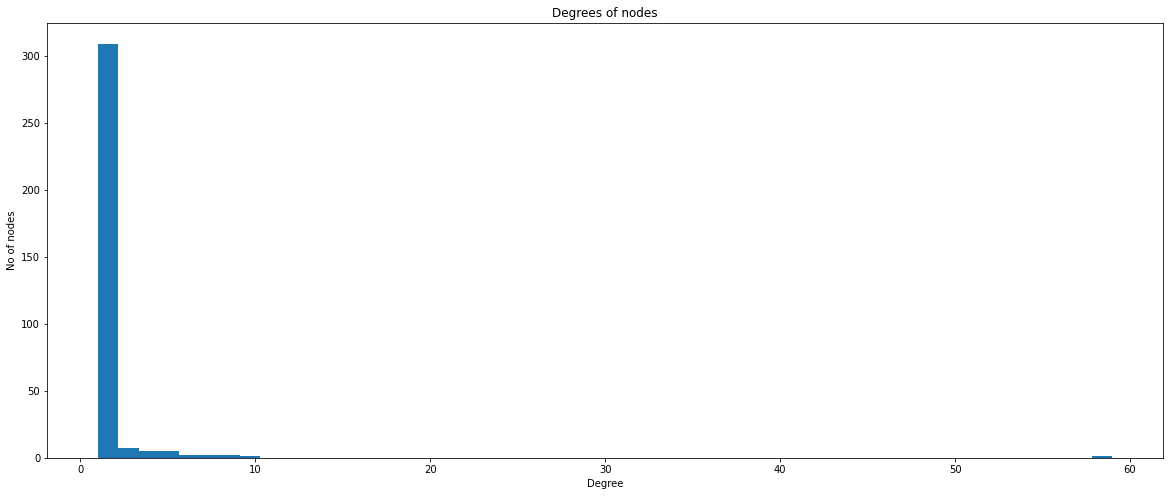

In [ ]:
plt.figure(figsize=(20,8))
plt.hist(degrees, bins =50)
plt.xlabel('Degree')
plt.ylabel('No of nodes')
plt.title('Degrees of nodes')

From here we can see that most of the nodes have a degree of 1 and not many nodes have a degree greater than one. Only 1 node has a degree of 59. Therefore this suggests that there are not many strong connections between the nodes and that most of the nodes are users which have tweeted once with the hashtag video or users who have been mentioned once with the hashtag video. There is not much connection between the nodes on average

In [ ]:
#Converting the degree to a list and taking the unique degrees in that
a=list(degrees)
np.unique(a)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 59])

In [ ]:
#Getting the fraction of nodes with the certain degrees
count_items={}
for num,cou in Counter(degrees).items():
  count_items[num]=cou/len(a)
arr=sorted(count_items.items())
frac=[]
for m,n in arr:
  frac.append(n)
frac

[0.7784431137724551,
 0.1467065868263473,
 0.020958083832335328,
 0.014970059880239521,
 0.014970059880239521,
 0.005988023952095809,
 0.005988023952095809,
 0.0029940119760479044,
 0.0029940119760479044,
 0.0029940119760479044,
 0.0029940119760479044]

Text(0.5, 1.0, 'Degree vs Fraction of nodes with that degree')

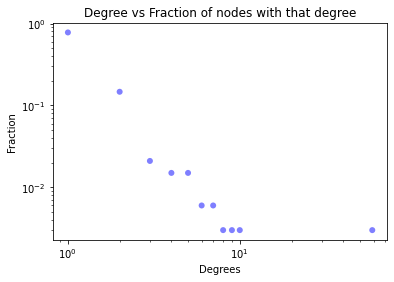

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(np.unique(a) ,frac,c='blue', alpha=.5, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Fraction')
ax.set_xlabel('Degrees')
plt.title('Degree vs Fraction of nodes with that degree')

In our graph, there does not seem to be a very clear power law trend, but we can definitely see glimpses of it. The presence of a slight power law trend may be due to the fact, that chances of high degree in such kind of tweets is very low. The reason is that the #video hashtag is generally used to describe a video or when a music, comedy, entertainment etc. video is going to be released or is released. Therefore the hashtag video is not used in many conversatitions except in the above given situations.

Hence , finding a very high degree is very rare for such kind of hashtags. If it was a hashtag like #trump, then we would see that the degree is high since that promotes multiple and two way converstions since people like to debate when such kind of a topic comes up. But with #video there is not much people like to talk about and even if they want to talk about a particular video, its name is used as the hashtag and not the hashtag #video itself. Hence most of the degrees is obviously going to be 1 and the as the degrees increase, the fraction goes down drastically leading to a power law trend.

In [ ]:
#Getting the edgeweight for each
edgeweight = {}
for (x,y) in videoGraph.edges():
  w = videoGraph[x][y]['numberMentions']
  edgeweight[(x,y)] = w

In [ ]:
#Finding the max edgeweight
max_key = max(edgeweight, key=edgeweight.get)
edgeweight[max_key]

24

In [ ]:
#Sorting the edgeweights in descending order
for w in sorted(edgeweight, key=edgeweight.get, reverse=True):
  print(w, edgeweight[w])

('videopremieres', 'muvids') 24
('im_preoprah', 'larsoncc') 8
('fabiocavinato', 'rafaeletc') 2
('fabiocavinato', 'dpadua') 2
('kulturzwitscher', 'artinberlin') 2
('cottageguru', 'themediaczar') 2
('anthonywright', 'brighteyes08') 2
('brighteyes08', 'gerard_k') 2
('onyxtic', 'anylabs') 2
('spartacus23', 'wissenerde') 2
('spartacus23', 'robbsie') 2
('spartacus23', 'press_me_now') 2
('globe_tourism', 'tweetmeme') 2
('globe_tourism', 'video_travel') 2
('doubledown_insl', 'misssideways') 2
('demonick', 'euveng') 2
('tristamsparks', 'mousavi1388') 2
('resemblance', 'steve_schippert') 2
('michaelqtodd', 'naosuzuki') 2
('yodspica_best)', 'thomasjhardy') 2
('thomasjhardy', 'hashwp') 2
('searchhashtags', '360kid') 1
('searchhashtags', 'idit') 1
('lesetipperin', 'n24_de)') 1
('alazenby', '12seconds') 1
('delitescere', 'jaycfields') 1
('julis_rz', 'piratenpartei') 1
('piratenpartei', 'undercore') 1
('piratenpartei', 'insidex') 1
('piratenpartei', '22jom06') 1
('piratenpartei', 'jayel88') 1
('pirat

**Here we can see that the edgeweight between muvids and videopremieres came out to be the highest with the value of 24**

In [ ]:
#Finding all the tweets with muvids and videopremieres
finaldf = videoTag[(videoTag['user'] == 'videopremieres') |(videoTag['user']=='muvids')]
finaldf.reset_index(drop=True,inplace=True)
finaldf

date  ... mentioned
0   2009-06-11 18:33:34  ...        []
1   2009-06-12 01:17:15  ...  [muvids]
2   2009-06-12 01:17:48  ...  [muvids]
3   2009-06-12 01:17:55  ...  [muvids]
4   2009-06-12 01:18:00  ...  [muvids]
5   2009-06-12 01:18:05  ...  [muvids]
6   2009-06-12 02:38:24  ...  [muvids]
7   2009-06-12 03:53:52  ...        []
8   2009-06-12 03:56:16  ...        []
9   2009-06-12 23:15:37  ...        []
10  2009-06-12 23:16:39  ...        []
11  2009-06-12 23:17:14  ...        []
12  2009-06-13 05:33:39  ...        []
13  2009-06-13 05:36:26  ...        []
14  2009-06-13 05:40:09  ...        []
15  2009-06-13 05:41:48  ...        []
16  2009-06-13 05:43:34  ...        []
17  2009-06-13 05:44:07  ...        []
18  2009-06-13 06:10:46  ...  [muvids]
19  2009-06-13 06:10:52  ...  [muvids]
20  2009-06-13 06:11:06  ...  [muvids]
21  2009-06-13 06:11:12  ...  [muvids]
22  2009-06-13 06:11:21  ...  [muvids]
23  2009-06-13 06:11:31  ...  [muvids]
24  2009-06-13 06:11:40  ...  [muvids]
25  2009-06-13 06:11:45  ...  [muvids]
26  2009-06-13 06:11:49  ...  [muvids]
27  2009-06-13 06:12:00  ...  [muvids]
28  2009-06-13 22:38:36  ...        []
29  2009-06-13 22:40:27  ...        []
30  2009-06-13 22:41:53  ...        []
31  2009-06-13 23:55:28  ...  [muvids]
32  2009-06-13 23:55:33  ...  [muvids]
33  2009-06-13 23:55:57  ...  [muvids]
34  2009-06-13 23:55:22  ...  [muvids]
35  2009-06-13 23:55:28  ...  [muvids]
36  2009-06-13 23:55:40  ...  [muvids]
37  2009-06-13 23:55:57  ...  [muvids]
38  2009-06-14 02:56:33  ...  [muvids]

[39 rows x 4 columns]

In [ ]:
#Finding all tweets in which muvids or videopremieres has been mentioned
for index,mention in enumerate(finaldf['mentioned']):
  if 'muvids' in mention:
    print(finaldf.loc[index]['tweet'])

RT @muvids: Video Premiere: Big Ang - Wifey (For Lifey) feat. Siobhan Gallagher http://muvids.com/5080 #music #video #premiere
RT @muvids: Video Premiere: Aqua - Back to the 80s http://muvids.com/6392 #music #video #premiere
RT @muvids: Video Premiere: blink-182 - What's My Age Again [Live] http://muvids.com/6393 #music #video #premiere
RT @muvids: Video Premiere: blink-182 - Dammit [Live] http://muvids.com/6394 #music #video #premiere
RT @muvids: Video Premiere: Jack's Mannequin - Swim http://muvids.com/6395 #music #video #premiere
RT @muvids: Video Premiere: Linkin Park - New Divide http://muvids.com/6398 #music #video #premiere
RT @muvids: Video Premiere: MC Lyte - Brooklyn http://muvids.com/6411 #music #video #premiere
RT @muvids: Video Premiere: PNC - Tonight http://muvids.com/6412 #music #video #premiere
RT @muvids: Video Premiere: Sean Kingston - Fire Burning (On The Dancefloor) [Lyric Video] http://muvids.com/6414 #music #video #premiere
RT @muvids: Video Premiere: Kate Earl - 

Here we can see that the there is just oneway conversation between muvids and videopremieres. Videopremieres mentioned muvids 24 times in their tweets.

The tweets as we can see are just retweets. Videopremieres just retweeted the tweets by muvids. After research I found that muvids is a small production house which makes small scale music videos. Therefore it just posted its videos as a tweet on twitter. Videopremieres also posts music videos, hence it just retweeted muvids videos by mentoning him and posting tweets on his own twitter handle.

Therefore the interaction is just videopremieres posting music video links of muvids by mentioning muvids in their tweets.

This makes sense and has the highest edgeweight, since both being music video twitter handles, both post music videos and in their interactions as well, music videos are being talked about. So every video made by muvids is also posted by videopremieres on their twitter handle as a retweet. Generally alot of music videos are posted and this being just a small dataset of less than a month, 24 videos were posted and videopremieres retweeted them. Hence this totally makes sense since both the twitter handles do the same thing ie. post music videos and having so many interactions is very common in these situations. Interactions are generally retweets in cases like these. 

**Visualizing the graph**

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
addRandomPositions(videoGraph)

In [ ]:
# map purd and YlGnBu color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
paired=cl.scales['9']['seq']['YlGnBu']
purd300 = cl.interp(purd, 300)
paired300= cl.interp(paired, 300)
HTML(cl.to_html(purd300))

In [ ]:
HTML(cl.to_html(paired300))

In [ ]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(videoGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(10*edgeWidth)
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text="Node1: %s Node2: %s <br> Number of mentions: %i " % (node1,node2,edgeWidth),
                hoverinfo='text',
                mode='lines', 
                #Size and colour are based on the edgeweight. The higher no of mentions, the more is
                #the edge width and the darker is the colour.
                line=scatter.Line(width=edgeWidth,color=paired300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict( 
                    size=nx.degree(graph,node), 
                    color=purd300[nodeColor],       
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
#Plotting the graph
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraph)

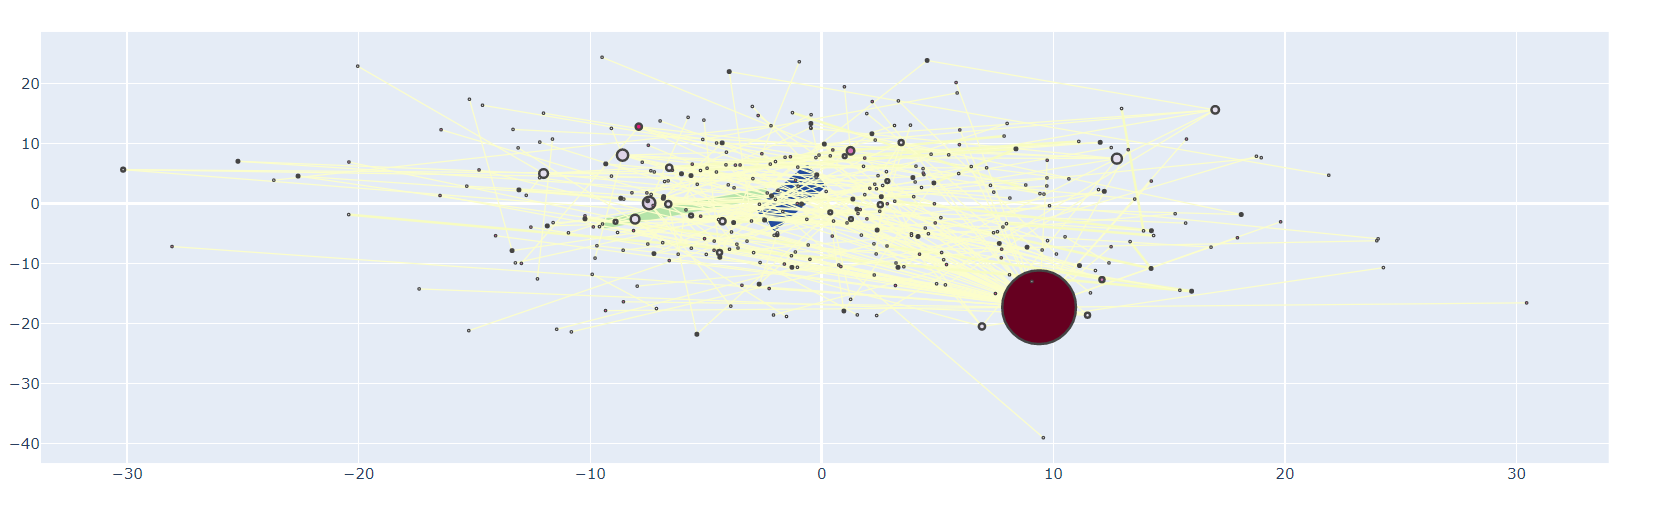

In [ ]:
from IPython.display import Image
Image('Capture1.PNG')

**Size and colour are based on the edgeweight. The higher no of mentions, the more is the edge width and the darker is the colour.**

Here we can clearly see that the edgeweight between muvids and videopremieres is the highest and the colour is also the darkest

In [ ]:
#Defining function for applying layout
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
#Planar Layout
videoGraphplanar = videoGraph.copy()
applyLayout(videoGraphplanar, nx.planar_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphplanar)

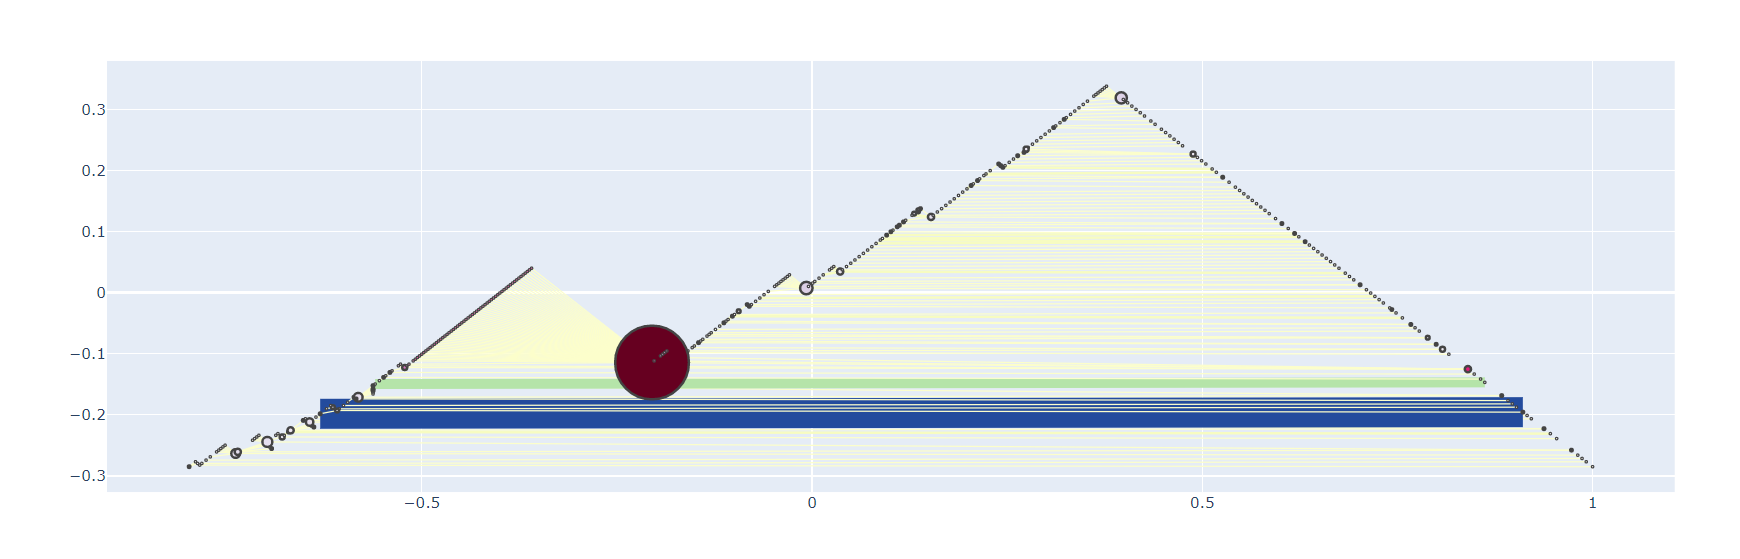

In [ ]:
from IPython.display import Image
Image('Capture2.PNG')

In [ ]:
#Circular Layout
videoGraphCircular = videoGraph.copy()
applyLayout(videoGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphCircular)

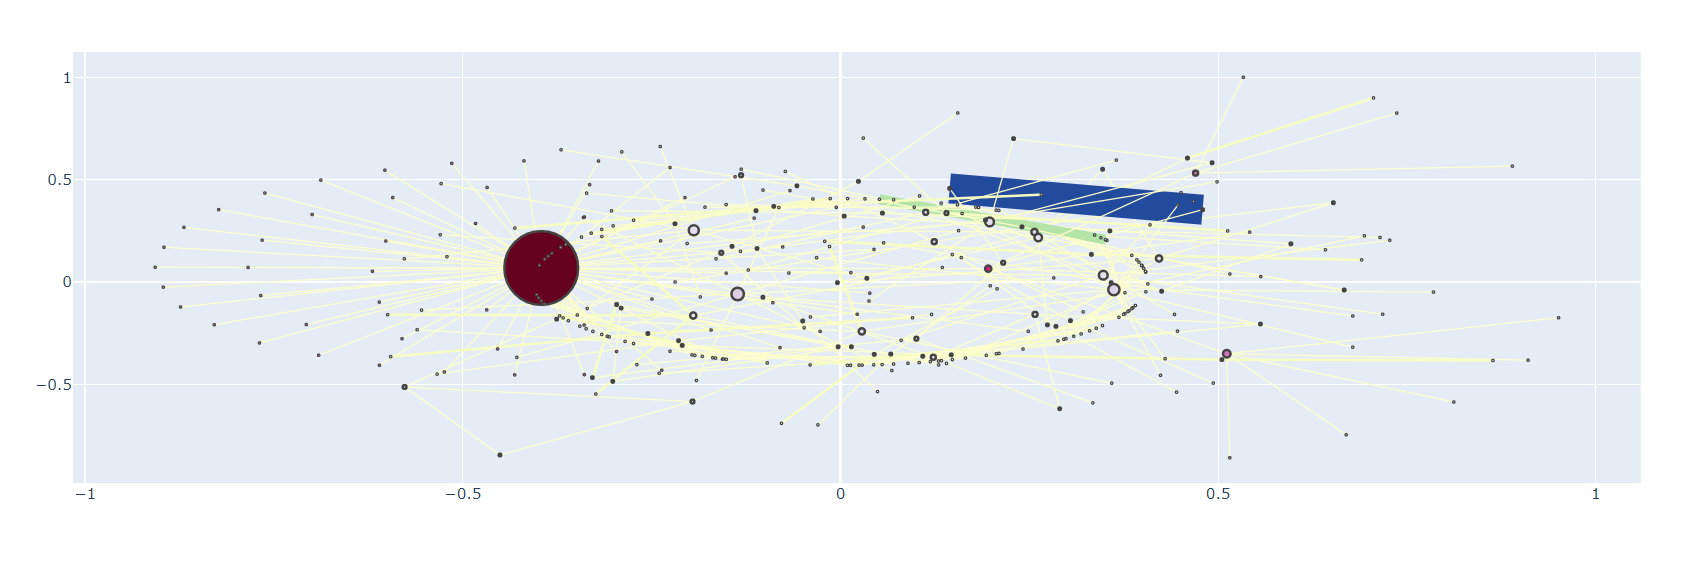

In [ ]:
from IPython.display import Image
Image('Capture4.PNG')

In [ ]:
#Kamada_Kawai Layout
videoGraphkk = videoGraph.copy()
applyLayout(videoGraphkk, nx.kamada_kawai_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphkk)

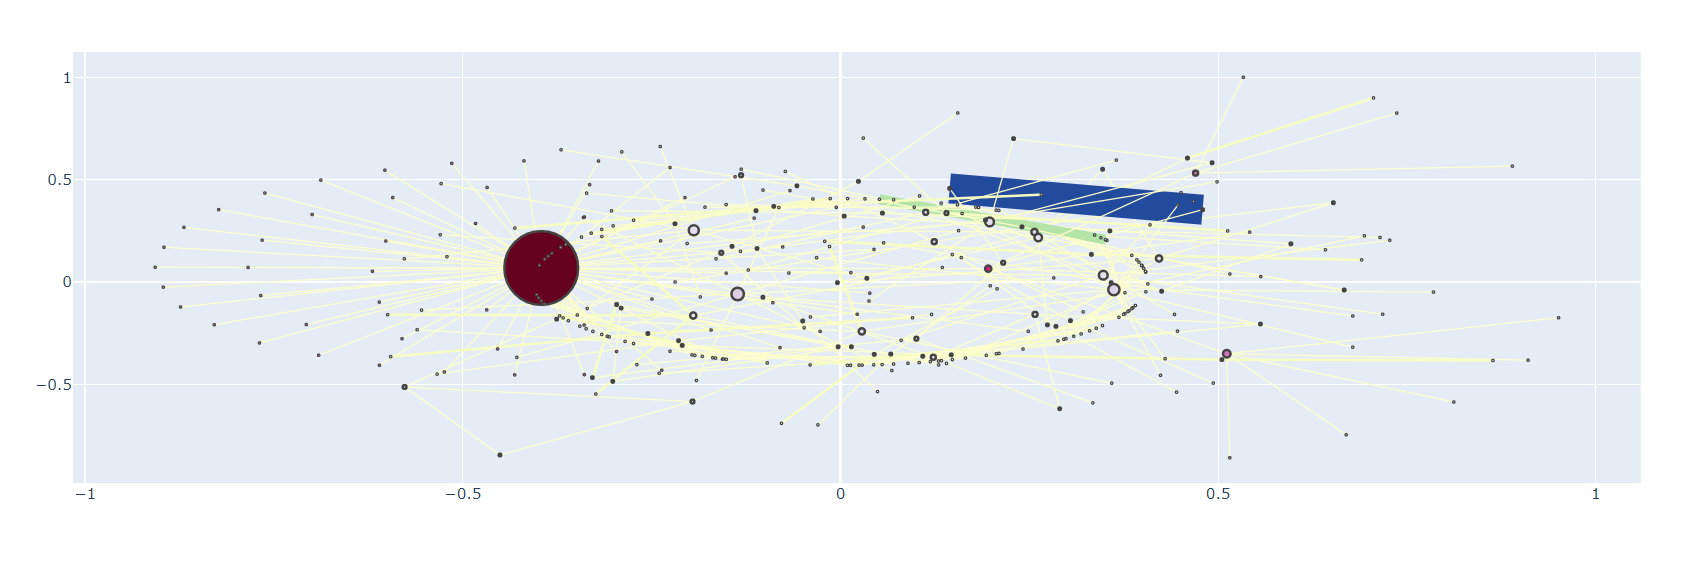

In [ ]:
from IPython.display import Image
Image('Capture4.PNG')

From these visualizations we can clearly see the edgeweights colour and width change according to their weights.

#Analyzing the most frequent non-stopwords in all the tweets with the hastag video, and providing a basic description of the main themes

In [ ]:
#Reseting the index
videoTag.reset_index(drop=True,inplace=True)
videoTag

date  ...                                          mentioned
0    2009-06-11 17:06:21  ...                                     [360kid, idit]
1    2009-06-11 17:09:53  ...                                                 []
2    2009-06-11 17:10:13  ...                                                 []
3    2009-06-11 17:15:32  ...                                                 []
4    2009-06-11 17:20:46  ...                                                 []
..                   ...  ...                                                ...
763  2009-06-14 23:00:11  ...  [rodaika, tylerstuvwyz, theblacksunn, laurenba...
764  2009-06-14 23:20:15  ...                                                 []
765  2009-06-14 23:20:19  ...                                                 []
766  2009-06-14 23:29:11  ...                                                 []
767  2009-06-14 23:35:16  ...                                                 []

[768 rows x 4 columns]

In [ ]:
#Removing Stopwords from the tweets
for index,tweet in enumerate(videoTag['tweet']):
  text_tokens = word_tokenize(tweet.lower())
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  filtered_sentence = (" ").join(tokens_without_sw)
  videoTag.loc[index]['tweet']=filtered_sentence
#Clean Dataframe
videoTag

date  ...                                          mentioned
0    2009-06-11 17:06:21  ...                                     [360kid, idit]
1    2009-06-11 17:09:53  ...                                                 []
2    2009-06-11 17:10:13  ...                                                 []
3    2009-06-11 17:15:32  ...                                                 []
4    2009-06-11 17:20:46  ...                                                 []
..                   ...  ...                                                ...
763  2009-06-14 23:00:11  ...  [rodaika, tylerstuvwyz, theblacksunn, laurenba...
764  2009-06-14 23:20:15  ...                                                 []
765  2009-06-14 23:20:19  ...                                                 []
766  2009-06-14 23:29:11  ...                                                 []
767  2009-06-14 23:35:16  ...                                                 []

[768 rows x 4 columns]

In [ ]:
#Top nonstop words
tweetWords=[]
for tweets in videoTag['tweet']:
  text_tokens = word_tokenize(tweets)
  for words in text_tokens:
    if len(words.strip(""" ,.:'\";""")) > 2:
      tweetWords.append(words)
Counter(tweetWords).most_common(20)

[('http', 894),
 ('video', 727),
 ('obama', 141),
 ('2009-06-12', 110),
 ('music', 102),
 ('youtube', 96),
 ('videogames', 92),
 ('news', 84),
 ('premiere', 77),
 ('twitter', 69),
 ('sandboy', 69),
 ('today', 64),
 ('added', 63),
 ('//wefollow.com', 63),
 ('directory', 63),
 ('new', 47),
 ('movies', 47),
 ('tpb', 44),
 ('tcot', 44),
 ('pop', 41)]

Here we can see that the basic theme is related to videos of music, obama, youtube videos, news and videogames. So the basic theme here invlvolved is different types of videos. Probably there link is posted as the tweet , since https is the most common word. Also obama is mentioned alot followed by the date and music and youtube. So it is possible that there is some video about obama which people are tweeting and providing the date for it ie. December 6, 2009 which is a sunday. So assuming that people are mostly free on Sunday to check their social accounts, some major video involving obama or a music video was posted on twitter or a link was provided for it on youtube. Also news is posted alot so it links with obama. Therefore maybe obama's video was posted as the top news.

**Adding hover information for the nodes which lists the 3 most common words for each user.**

In [ ]:
#Taking TopK function from DS Assignment:
def getTopwords(df, kwords, label_value, label_column='user', operation=operator.eq, value_column='tweet'):
    tokenizer = RegexpTokenizer(r'\w+')
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update(word.lower()
                            for word in tokenizer.tokenize(review) 
                              if len(word.lower()) > 2)
    topk = counter.most_common(kwords)
    return topk

In [ ]:
#Defining a method to plot the graph according to the no of words
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(videoGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        topwords=getTopwords(videoTag,3,node)
        nodecolor=int(99*(len(topwords)))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Top 3 words: %s" % (node, topwords),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodecolor], 
                    size=9*(math.log(len(topwords)+1)),    
                    line=dict(width=.5)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraph)

**Here I added hover info which lists the 3 most common words for each user and the frequency of each of them.**

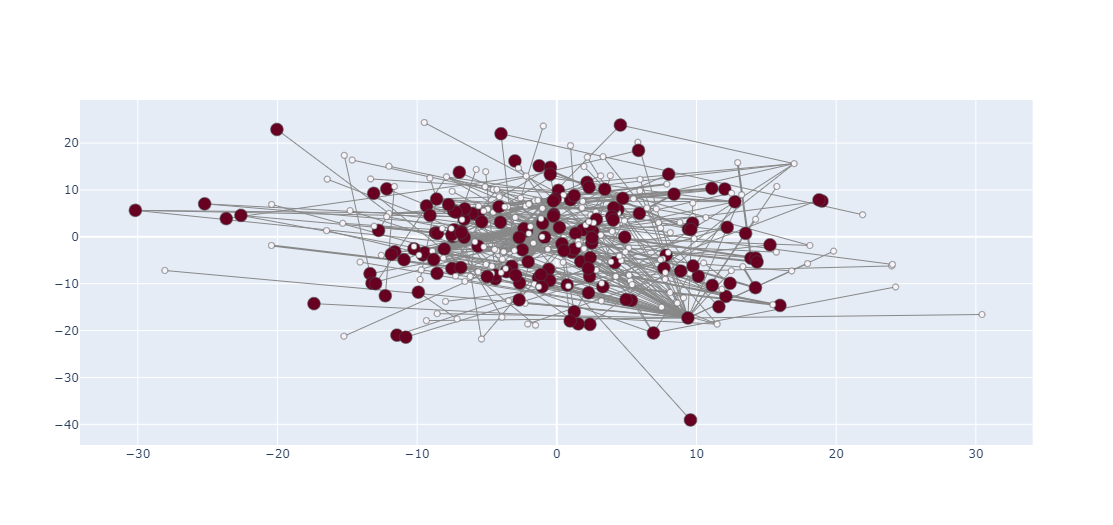

In [ ]:
from IPython.display import Image
Image('newplot.png')

In [ ]:
#Circular Layout
videoGraphCircular = videoGraph.copy()
applyLayout(videoGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphCircular)

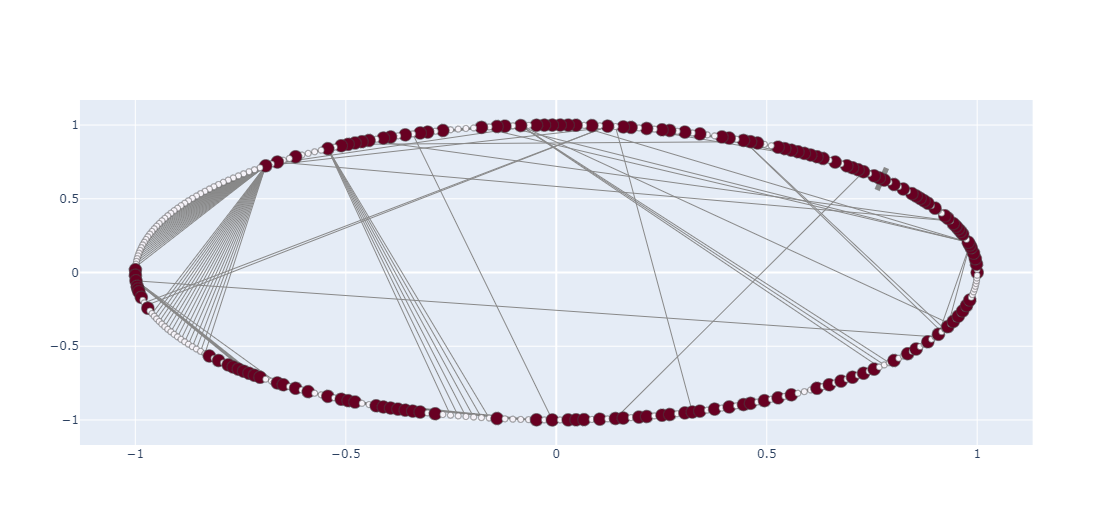

In [ ]:
from IPython.display import Image
Image('newplot (1).png')

**Nodes which have no words are white in color whereas nodes which have words are maroon in color.**

In [ ]:
#Getting the 2 nodes with the same words
for (node1, node2) in videoGraph.edges():
  topwords1=getTopwords(videoTag,3,node1)
  topwords2=getTopwords(videoTag,3,node2)
  i=0
  for key1 in topwords1:
    for key2 in topwords2:
      if key2==key1:
        i=i+1
  if i>=2:
    print(node1, node2)

piratenpartei nightwolf42
piratenpartei balkonschlaefer
elissar palestinevideo
drfinnerty yipeedoodah
jenocide312 adam_walters
beshirthappy ethanjaynes
annsom annsom
websenat rutiso
staunchconserv creepingsharia
sayitwithecards sayitwithecards
whaskins whaskins
twitsmagca twitsmagca
onyxtic anylabs
fabrice2038 bizurke
foto8 fluffyhoneybee
isaacvanname makdotgnu
whothehellare_u kackerl


Here we can see that only these nodes pairs out of all node pairs have the same words .ie 2 or more than 2 of the top 3 words are common. This is very less when compared to the total no of node pairs ie. 268

## Note: When we look at the node pairs, it is not possible to analyze all the node pairs and check what is the theme by looking at the words. We can do it on the graph itself, but when we submit the assignment, I am not sure if you can access the hover on it. Therefore I will list down node pairs and try to analyze from there whether the themes are similar or not

In [ ]:
i=0
for (node1, node2) in videoGraph.edges():
  topwords1=getTopwords(videoTag,3,node1)
  topwords2=getTopwords(videoTag,3,node2)
  if i<20 and len(topwords1)>0 and len(topwords2)>0:
    print(str(node1)+" and "+str(node2))
    print(topwords1,topwords2)

julis_rz and piratenpartei
[('piratenpartei', 1), ('laut', 1), ('spiele', 1)] [('spiegel', 1), ('online', 1), ('protest', 1)]
piratenpartei and undercore
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 1), ('laut', 1), ('spiele', 1)]
piratenpartei and insidex
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 1), ('laut', 1), ('spiele', 1)]
piratenpartei and 22jom06
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 1), ('laut', 1), ('spiele', 1)]
piratenpartei and jayel88
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 1), ('laut', 1), ('spiele', 1)]
piratenpartei and nightwolf42
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 2), ('spiegel', 1), ('online', 1)]
piratenpartei and balkonschlaefer
[('spiegel', 1), ('online', 1), ('protest', 1)] [('piratenpartei', 2), ('spiegel', 1), ('online', 1)]
stevekloyda and cottageguru
[('class', 2), ('new', 1), ('video', 1)] [('stevekloyda', 1), ('rock', 1), (

Here from what I can analyze, some node pairs have similar themes such as im_preoprah and larsoncc which are talking about videogames. Then texascostal and therightblue are also taking about the NBC report which is the common theme in them. 

Then some of them have dissimilar themes like resemblence and thepriss which are talking about tcot and resemblence don and drinking. So all are different themes.

This can be seen from their top words below:

In [ ]:
  topwords1=getTopwords(videoTag,3,'im_preoprah')
  print(topwords1)
  topwords2=getTopwords(videoTag,3,'larsoncc')
  print(topwords2)

[('larsoncc', 8), ('videogames', 8), ('http', 8)]
[('videogames', 1), ('mario', 1), ('luigi', 1)]


In [ ]:
  topwords1=getTopwords(videoTag,3,'texascoastal')
  print(topwords1)
  topwords2=getTopwords(videoTag,3,'therightblue')
  print(topwords2)

[('watch', 2), ('nbc', 2), ('report', 2)]
[('texascoastal', 1), ('watch', 1), ('nbc', 1)]


In [ ]:
  topwords1=getTopwords(videoTag,3,'resemblance')
  print(topwords1)
  topwords2=getTopwords(videoTag,3,'thepriss')
  print(topwords2)

[('http', 4), ('tcot', 4), ('video', 4)]
[('resemblance', 1), ('drinking', 1), ('beverage', 1)]


#Used PageRank and Closeness Centrality to calculate the centrality of the nodes on my graph based on each of the measures. I also provided a mention graph visualization for each measure that demonstrates the centrality value of each node using a visual property (size, color, etc) for each of the centrality measures.


**Closeness Centrality**

In [ ]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(videoGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=(nodeCentr+.00001)*100,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraph)

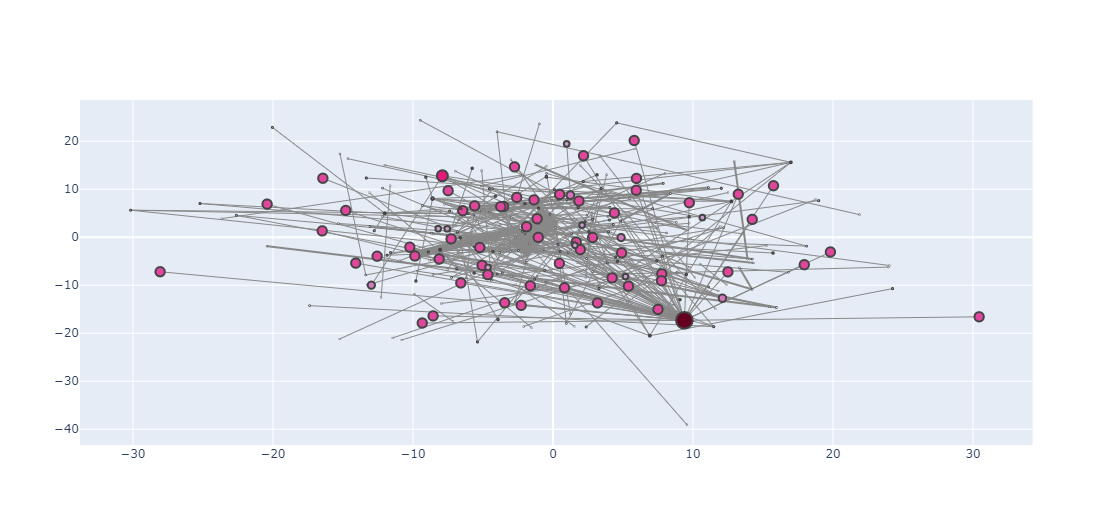

In [ ]:
from IPython.display import Image
Image('newplot (2).png')

In [ ]:
#Circular Layout
videoGraphCircular = videoGraph.copy()
applyLayout(videoGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphCircular)

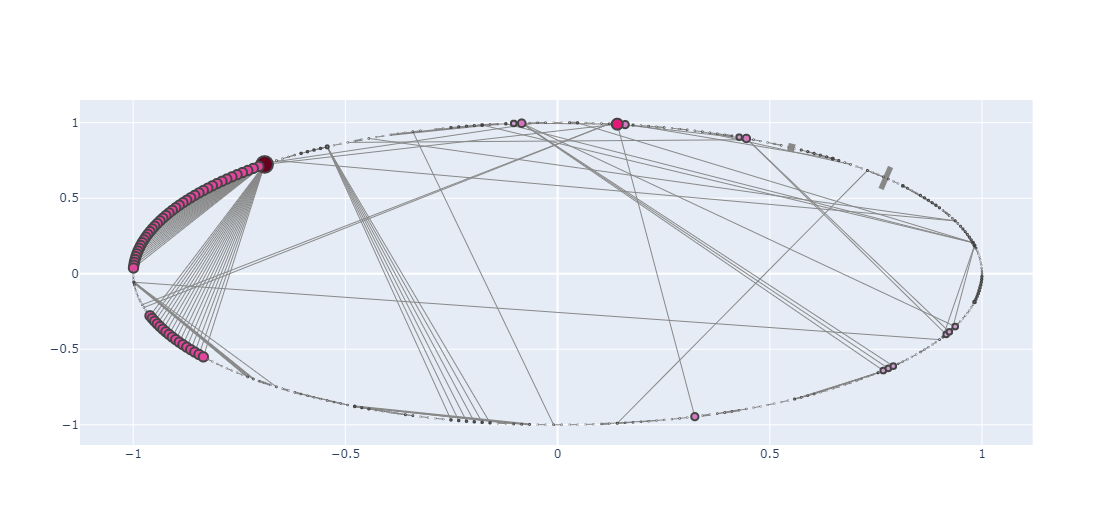

In [ ]:
from IPython.display import Image
Image('newplot (3).png')

The nodes with the highest centrality are the biggest and have a darker red shade

**PageRank**

In [ ]:
def plotNetworkSizeColor(graph):
    pagerankcen = nx.pagerank(graph)  
    maxpagerank = max(pagerankcen.values())
    minpagerank = min(pagerankcen.values())
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodepagerank = pagerankcen[node]
        nodeColor = int(299*(nodepagerank-minpagerank)/(maxpagerank-minpagerank))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Ranking: %.3f" % (node, nodepagerank),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nodepagerank*1000,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraph)

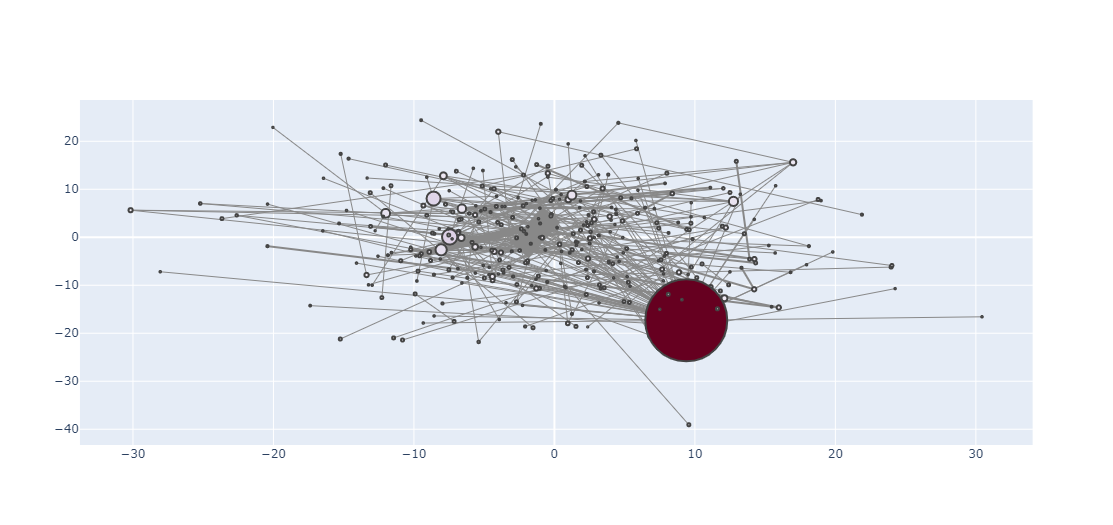

In [ ]:
from IPython.display import Image
Image('newplot (4).png')

In [ ]:
#Circular Layout
videoGraphCircular = videoGraph.copy()
applyLayout(videoGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(videoGraphCircular)

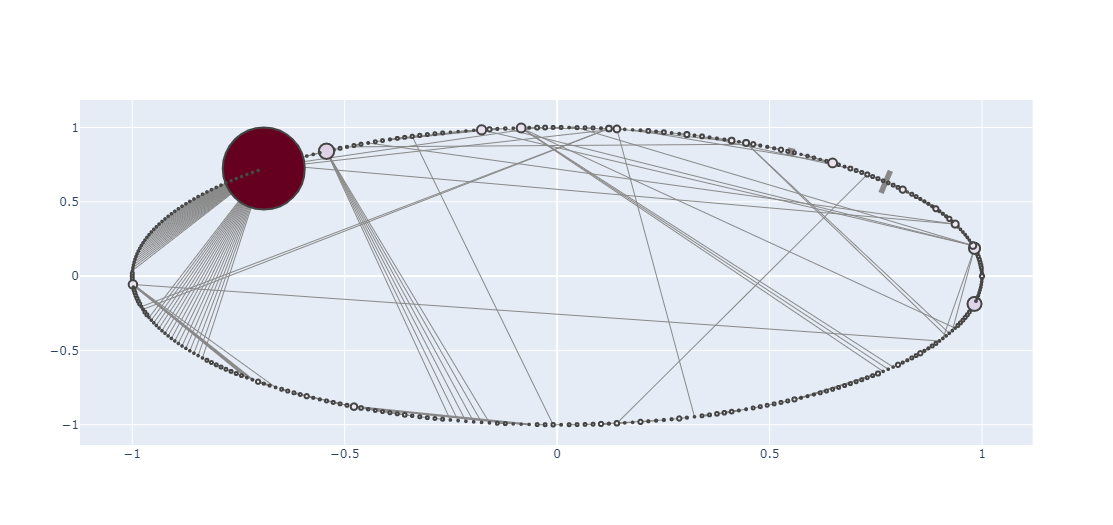

In [ ]:
from IPython.display import Image
Image('newplot (5).png')

The nodes with the highest centrality are the biggest and have a darker red shade

**5 most central nodes for each of the centrality measures**

In [ ]:
closenessCentr = nx.closeness_centrality(videoGraph)
rankclosenessCentr=sorted(closenessCentr, key=closenessCentr.get, reverse=True)
i=0
for key in rankclosenessCentr:
  print(str(key)+": "+str(closenessCentr[key]))
  i=i+1
  if i>4:
    break

hourlytechdeals: 0.16635316635316635
: 0.11049735867254117
pedrobeck: 0.0940257027213549
paradoxo: 0.0940257027213549
isihac72: 0.0940257027213549


In [ ]:
pagerankcen = nx.pagerank(videoGraph)
rankpagerank=sorted(pagerankcen, key=pagerankcen.get, reverse=True)
i=0
for key in rankpagerank:
  print(str(key)+": "+str(pagerankcen[key]))
  i=i+1
  if i>4:
    break

hourlytechdeals: 0.08207740780989202
adbert: 0.015380618653029865
420jams: 0.014004329022254075
piratenpartei: 0.011251749760702541
sayitwithecards: 0.00917719025834938


1) The results between the centrality measures are different apart from the most central node. ie. hourlytechdeals

They are different probably because both of them use different techniques and types of centrality. Closeness centrality measures the shortest distance between the nodes but it is always not the case that this is accurate since the shortest distance does not necessarliy mean the value is central. For PageRank, the measurement is based on the weight which is calculated by summing the incoming links. Its rank changes after every iteration. Here we are taking the iterations as 100 by default. Therefore both the measures are different and hence give different results.


From my perspective, pagerank provides a better interpretation than closeness since closeness is not always accurate, since the shortest distance does not necessarliy mean the value is central. Whereas pagerank works on the weights of the incoming links and then the ranking is given based on the weights of the incoming links from nodes who have been ranked similarly. Therefore there is a chain of ranks being given to the nodes and then from 1 node to another the ranking is taken forward. So in every step, the ranking makes a huge difference. This way there is more chance of getting to the central node accurately since in every step the ranking of that central nodes is bound to increase.

Moreover by looking at the centrality values in both the graphs we can easily make out the central nodes in PageRank, whereas in closeness centrality, most of the nodes have similar values which makes it hard to understand which is the central node. It is not possible to have so many central nodes. Distinguishing between nodes becomes very difficult.

#**Used NRCLex to evaluate each tweet and determine the number of words in each dimension of emotion**

In [ ]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Getting the absolute values of no of emotions in a tweet
absolute_numbers=[]
for index, tweet_data in videoTag.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)
  emotions=text_object.raw_emotion_scores
  absolute_numbers.append(emotions)
absolute_numbers

[{'fear': 1, 'joy': 1, 'positive': 4, 'trust': 2},
 {'joy': 1, 'negative': 1, 'positive': 1, 'trust': 1},
 {'disgust': 1, 'trust': 1},
 {'anger': 1, 'negative': 1, 'positive': 2, 'trust': 1},
 {},
 {},
 {},
 {'anger': 1, 'anticipation': 1, 'disgust': 1, 'negative': 2},
 {},
 {'positive': 1},
 {'joy': 2, 'positive': 3, 'sadness': 2},
 {'joy': 2, 'positive': 3, 'sadness': 2},
 {'positive': 1},
 {'fear': 1, 'joy': 1, 'positive': 1, 'sadness': 1, 'surprise': 1},
 {},
 {},
 {},
 {'fear': 1, 'positive': 1},
 {'fear': 1, 'joy': 1, 'negative': 1, 'positive': 4, 'sadness': 1},
 {'anticipation': 1, 'positive': 1},
 {},
 {'positive': 1, 'trust': 1},
 {},
 {},
 {},
 {'anticipation': 2,
  'fear': 1,
  'joy': 2,
  'positive': 2,
  'sadness': 2,
  'surprise': 1},
 {},
 {},
 {},
 {'anticipation': 1, 'joy': 2, 'positive': 2, 'trust': 1},
 {'negative': 2, 'surprise': 2},
 {},
 {'anticipation': 1, 'fear': 1},
 {'positive': 1},
 {},
 {'positive': 1, 'trust': 1},
 {},
 {'anticipation': 1, 'fear': 1, 'posit

In [ ]:
absolute_numbers[56]

{'anticipation': 1, 'joy': 1, 'negative': 1, 'positive': 1, 'surprise': 1}

In [ ]:
#Getting the total no of values for each emotion in all the tweets
result = dict(functools.reduce(operator.add, 
         map(collections.Counter, absolute_numbers))) 
result

{'anger': 115,
 'anticipation': 244,
 'disgust': 61,
 'fear': 140,
 'joy': 336,
 'negative': 253,
 'positive': 588,
 'sadness': 199,
 'surprise': 162,
 'trust': 210}

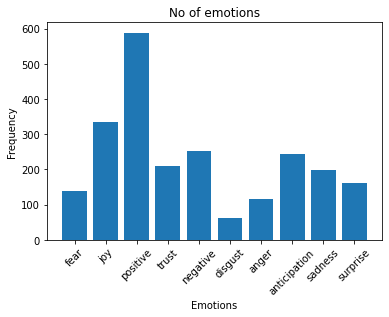

In [ ]:
#Plotting the bar chart of No of emotions
plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)), list(result.keys()), rotation=45)
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('No of emotions')
plt.show()

Positive is the most common emotion followed by joy which makes sense since the hashtag is video and generally this hashtag is used when some video is released or to express emotions on a video. Most of the tweets in the data are of videos being posted and their links being provided. So the classification of them as positive or joyful does not really make sense. How can there be positiveness found in words which are just links to the videos ? I am printing the list of tweets with the positive words and we can clearly see that most of them are just tweets to post videos and there is no positive emotion or joy in them.

On the other hand there are really some tweets which are negative or positive in emotion which can be correctly justified.

If I ignore the correctness of the emotions tagging,
Overall for the video hashtag, the positive sentiment can make sense since the video can be both a positive video or a negative video. Examples of both are : 1) Music video of favourite singer 
2) Video of a robbery
Therefore it is just a possible case that in this dataset the positive videos were more than negative ones and also this is a very open hashtag, may emotions can be involved with it. There is no one emotion that has to be involved.

In [ ]:
for index,emotions in enumerate(absolute_numbers):
  for key,value in emotions.items():
    if key=='positive':
      print(videoTag.iloc[index]['tweet'])

@ 360kid @ idit rt gee said : see emotional intelligence important stem knowledge # gls09 # -learning # video
miley , fergie , lindsay , amy , jenny gossip video ... http : //tinyurl.com/nayj3a true ? judge ... # video # news
new # video shows officer shove , taser 72-year-old great grandmother http : //ow.ly/dxt2 # news # notcool # texas easy 're old..
healthy tv video promo live ! let games begins ! http : //bit.ly/13ewm2 # podcast # video # health
music video - versaemerge - `` authors '' : rock & alternative # music # video # musicvideos http : //tinyurl.com/njvkbq
music video - versaemerge - `` authors '' : rock & alternative # music # video # musicvideos http : //tinyurl.com/njvkbq
messing @ 12seconds # video . 'll see get treo ( days yore ) cooperate .
video premiere : veer union - seasons http : //muvids.com/6396 # music # video # premiere
sandboy : ! tpb # video # movies echelon conspiracy [ 2009 ] [ dvdr5rip ] [ 300mb ] http : //bit.ly/jroaa : sandboy 's status .. http : //bi

In [ ]:
print(videoTag.iloc[10]['tweet'])
absolute_numbers[10]

music video - versaemerge - `` authors '' : rock & alternative # music # video # musicvideos http : //tinyurl.com/njvkbq


{'joy': 2, 'positive': 3, 'sadness': 2}

Now how is the above video termed as positive and joyful and sad at the same time ? Maybe emerge is taken as a positive and joyful word and alternative or rock is taken as a sad word. Therefore for this data sentiment prediction does not really make sense since most of the tweets are sentimentless.

In [ ]:
print(videoTag.iloc[32]['tweet'])
absolute_numbers[32]

quite tense watch & 'm really sure upper hand : # dailyshow visits th # nytimes — http : //tr.im/ocvx # video


{'anticipation': 1, 'fear': 1}

Here we can see that the tweet has been identified with the correct sentiment. ie. anticipation and fear.


In [ ]:
#Counting the no of tweets made by the user
a=dict(videoTag['user'].value_counts())

In [ ]:
#Keeping only the users who made minimum 3 tweets
finaldict = dict( (key, value) for (key, value) in a.items() if value > 2 )

In [ ]:
#Joining the tweets of each user
videoTag=videoTag.groupby('user', as_index=False).agg({'tweet' : ' '.join})

In [ ]:
#New dataframe for only users with more than 2 tweets
videoTag1=videoTag.loc[videoTag['user'].isin(finaldict.keys())]

In [ ]:
videoTag1.reset_index(drop=True,inplace=True)

In [ ]:
videoTag1

user                                              tweet
0               73k  # cool # video diary great . http : //cli.gs/q...
1        _karenrose  2 favorite republicans ! http : //tr.im/oeas @...
2            adbert  # riffriday # video [ rolling stones - brown s...
3       cashreports  obama news video -- obama new gm http : //bit....
4        chowjackie  introducing google squared http : //bit.ly/clo...
5    cnbctopstories  next generation gaming consoles http : //cnbc....
6           dezoris  # videogames mario luigi : bowser 's inside st...
7     digital_video  # amazon # video # 5 : killshot [ hd ] : kills...
8     elio_assuncao  prank day ! ! ! ! http : //twitpwr.com/hld/ rt...
9      flickrvideos  otis trick # 1 : bang ! gino # video http : //...
10   getvidgamejobs  3d artist - hyper-real film quality character ...
11    govnewstweets  obama news video -- obama new gm http : //bit....
12     hammarstrand  filet-a-fish friday http : //bit.ly/hovax # vi...
13      im_preoprah  rt @ larsoncc : # videogames # e3 mario luigi ...
14   metalmelodique  witchking - check new video clip `` bearer goe...
15           muvids  video premiere : veer union - seasons http : /...
16        n24_video  # video : n24 klartext richtig arcandor helfen...
17        nakedtech  red faction guerrilla london promotion http : ...
18         namak467  sandboy : ! tpb # video # movies echelon consp...
19     newstweeters  6-8-9 obamacare top page views- 789- # obama #...
20       newyoutube  today 's risingvid : big green tractor # youtu...
21  obama_worldnews  obama news video- obama 's cairo speech muslim...
22        pennmedia  business usual jc , heart # video http : //bit...
23         populard  # video hell hounds & imperial zombies unleash...
24      resemblance  wow good ! http : //bit.ly/uqyem # klavan cult...
25          rtlinfo  # videortl - reynders : `` prêts lâcher l'oliv...
26      spartacus23  verheerender großbrand : tanklager kiel flamme...
27      spikedhumor  # video nc avgn : tmnt coming shells tour : no...
28        starvideo  # video gon call comedy ? try harold ramis htt...
29  strangius_dudus  wicked dance ambient chill tracks..check http ...
30   tallivansunder  healthy tv video promo live ! let games begins...
31   tnd_videogames  major mount changes coming world warcraft ( ht...
32     totallyfuzzy  music video - versaemerge - `` authors '' : ro...
33         trav2016  today 's pop : final destination movie trailer...
34    tristamsparks  quite tense watch & 'm really sure upper hand ...
35    unitedmusicro  get # music # video games # electro # dance # ...
36  videogamesdeals  # videogamesdeals # 4 : wii nunchuk controller...
37   videopremieres  rt @ muvids : video premiere : big ang - wifey...
38      web_cardiff  prank day ! ! ! ! http : //twitpwr.com/hld/ rt...
39    yodspica_best  prank day ! ! ! ! http : //twitpwr.com/hld/ rt...
40   yodspica_super  prank day ! ! ! ! http : //twitpwr.com/hld/ rt...

In [ ]:
#Fraction of emotions for each user
rel_numbers1=[]
for index, tweet_data in videoTag1.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)
  relative_numbers = text_object.affect_frequencies
  rel_numbers1.append(relative_numbers)

In [ ]:
rel_numbers1

[{'anger': 0.0,
  'anticip': 0.0,
  'anticipation': 0.2,
  'disgust': 0.0,
  'fear': 0.05,
  'joy': 0.2,
  'negative': 0.05,
  'positive': 0.35,
  'sadness': 0.0,
  'surprise': 0.0,
  'trust': 0.15},
 {'anger': 0.09090909090909091,
  'anticip': 0.0,
  'disgust': 0.0,
  'fear': 0.09090909090909091,
  'joy': 0.09090909090909091,
  'negative': 0.18181818181818182,
  'positive': 0.18181818181818182,
  'sadness': 0.18181818181818182,
  'surprise': 0.0,
  'trust': 0.18181818181818182},
 {'anger': 0.10526315789473684,
  'anticip': 0.0,
  'anticipation': 0.10526315789473684,
  'disgust': 0.0,
  'fear': 0.05263157894736842,
  'joy': 0.17543859649122806,
  'negative': 0.05263157894736842,
  'positive': 0.24561403508771928,
  'sadness': 0.03508771929824561,
  'surprise': 0.08771929824561403,
  'trust': 0.14035087719298245},
 {'anger': 0.0,
  'anticip': 0.0,
  'disgust': 0.0,
  'fear': 0.0,
  'joy': 0.0,
  'negative': 0.0,
  'positive': 0.0,
  'sadness': 0.0,
  'surprise': 0.0,
  'trust': 0.0},
 {

In [ ]:
#Adding column of emotions to new dataframe
videoTag1['emotions']=rel_numbers1
videoTag1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



user  ...                                           emotions
0               73k  ...  {'fear': 0.05, 'anger': 0.0, 'anticip': 0.0, '...
1        _karenrose  ...  {'fear': 0.09090909090909091, 'anger': 0.09090...
2            adbert  ...  {'fear': 0.05263157894736842, 'anger': 0.10526...
3       cashreports  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
4        chowjackie  ...  {'fear': 0.09090909090909091, 'anger': 0.09090...
5    cnbctopstories  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
6           dezoris  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
7     digital_video  ...  {'fear': 0.056818181818181816, 'anger': 0.1818...
8     elio_assuncao  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
9      flickrvideos  ...  {'fear': 0.10526315789473684, 'anger': 0.10526...
10   getvidgamejobs  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
11    govnewstweets  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
12     hammarstrand  ...  {'fear': 0.3333333333333333, 'anger': 0.0, 'an...
13      im_preoprah  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
14   metalmelodique  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
15           muvids  ...  {'fear': 0.038461538461538464, 'anger': 0.0256...
16        n24_video  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
17        nakedtech  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
18         namak467  ...  {'fear': 0.0851063829787234, 'anger': 0.085106...
19     newstweeters  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
20       newyoutube  ...  {'fear': 0.03389830508474576, 'anger': 0.03389...
21  obama_worldnews  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
22        pennmedia  ...  {'fear': 0.08333333333333333, 'anger': 0.0, 'a...
23         populard  ...  {'fear': 0.14285714285714285, 'anger': 0.14285...
24      resemblance  ...  {'fear': 0.09523809523809523, 'anger': 0.0, 'a...
25          rtlinfo  ...  {'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '...
26      spartacus23  ...  {'fear': 0.0, 'anger': 0.5, 'anticip': 0.0, 't...
27      spikedhumor  ...  {'fear': 0.10526315789473684, 'anger': 0.07894...
28        starvideo  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
29  strangius_dudus  ...  {'fear': 0.022222222222222223, 'anger': 0.0, '...
30   tallivansunder  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
31   tnd_videogames  ...  {'fear': 0.11666666666666667, 'anger': 0.1, 'a...
32     totallyfuzzy  ...  {'fear': 0.02564102564102564, 'anger': 0.01282...
33         trav2016  ...  {'fear': 0.08333333333333333, 'anger': 0.02777...
34    tristamsparks  ...  {'fear': 0.2727272727272727, 'anger': 0.181818...
35    unitedmusicro  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
36  videogamesdeals  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
37   videopremieres  ...  {'fear': 0.020202020202020204, 'anger': 0.0202...
38      web_cardiff  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
39    yodspica_best  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
40   yodspica_super  ...  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...

[41 rows x 3 columns]

In [ ]:
#Making a new dataframe for emotions of each user
emotions_df=pd.DataFrame.from_dict(rel_numbers1)
emotions_df['anticipation'] = emotions_df['anticipation'].fillna(0)
emotions_df.drop('anticip',axis=1,inplace=True)
emotions_df1=emotions_df.copy()
emotions_df1['user']=list(videoTag1['user'])
emotions_df1

fear     anger     trust  ...       joy  anticipation             user
0   0.050000  0.000000  0.150000  ...  0.200000      0.200000              73k
1   0.090909  0.090909  0.181818  ...  0.090909      0.000000       _karenrose
2   0.052632  0.105263  0.140351  ...  0.175439      0.105263           adbert
3   0.000000  0.000000  0.000000  ...  0.000000      0.000000      cashreports
4   0.090909  0.090909  0.181818  ...  0.090909      0.090909       chowjackie
5   0.000000  0.000000  0.000000  ...  0.000000      0.000000   cnbctopstories
6   0.000000  0.000000  0.181818  ...  0.181818      0.181818          dezoris
7   0.056818  0.181818  0.125000  ...  0.090909      0.045455    digital_video
8   0.000000  0.000000  0.000000  ...  0.166667      0.250000    elio_assuncao
9   0.105263  0.105263  0.105263  ...  0.052632      0.052632     flickrvideos
10  0.000000  0.000000  0.000000  ...  0.000000      0.000000   getvidgamejobs
11  0.000000  0.000000  0.000000  ...  0.000000      0.000000    govnewstweets
12  0.333333  0.000000  0.000000  ...  0.000000      0.666667     hammarstrand
13  0.000000  0.000000  0.176471  ...  0.176471      0.235294      im_preoprah
14  0.000000  0.000000  0.166667  ...  0.000000      0.083333   metalmelodique
15  0.038462  0.025641  0.012821  ...  0.282051      0.012821           muvids
16  0.000000  0.000000  0.000000  ...  0.000000      0.000000        n24_video
17  0.000000  0.000000  0.000000  ...  0.000000      0.333333        nakedtech
18  0.085106  0.085106  0.021277  ...  0.000000      0.021277         namak467
19  0.000000  0.000000  0.200000  ...  0.000000      0.200000     newstweeters
20  0.033898  0.033898  0.025424  ...  0.156780      0.156780       newyoutube
21  0.000000  0.000000  0.000000  ...  0.000000      0.000000  obama_worldnews
22  0.083333  0.000000  0.250000  ...  0.083333      0.083333        pennmedia
23  0.142857  0.142857  0.095238  ...  0.047619      0.095238         populard
24  0.095238  0.000000  0.142857  ...  0.190476      0.095238      resemblance
25  0.250000  0.000000  0.250000  ...  0.000000      0.000000          rtlinfo
26  0.000000  0.500000  0.000000  ...  0.000000      0.000000      spartacus23
27  0.105263  0.078947  0.131579  ...  0.052632      0.105263      spikedhumor
28  0.000000  0.000000  0.000000  ...  0.000000      0.000000        starvideo
29  0.022222  0.000000  0.111111  ...  0.222222      0.088889  strangius_dudus
30  0.000000  0.000000  0.000000  ...  0.000000      0.000000   tallivansunder
31  0.116667  0.100000  0.066667  ...  0.050000      0.116667   tnd_videogames
32  0.025641  0.012821  0.012821  ...  0.282051      0.000000     totallyfuzzy
33  0.083333  0.027778  0.000000  ...  0.027778      0.055556         trav2016
34  0.272727  0.181818  0.000000  ...  0.000000      0.181818    tristamsparks
35  0.000000  0.000000  0.060000  ...  0.280000      0.060000    unitedmusicro
36  0.000000  0.000000  0.000000  ...  0.250000      0.250000  videogamesdeals
37  0.020202  0.020202  0.000000  ...  0.303030      0.030303   videopremieres
38  0.000000  0.000000  0.000000  ...  0.166667      0.250000      web_cardiff
39  0.000000  0.000000  0.000000  ...  0.166667      0.250000    yodspica_best
40  0.000000  0.000000  0.000000  ...  0.222222      0.222222   yodspica_super

[41 rows x 11 columns]

In [ ]:
#Merging both dataframes
emotions_df_final=pd.merge(videoTag1,emotions_df1, on='user')

In [ ]:
emotions_df_final

user  ... anticipation
0               73k  ...     0.200000
1        _karenrose  ...     0.000000
2            adbert  ...     0.105263
3       cashreports  ...     0.000000
4        chowjackie  ...     0.090909
5    cnbctopstories  ...     0.000000
6           dezoris  ...     0.181818
7     digital_video  ...     0.045455
8     elio_assuncao  ...     0.250000
9      flickrvideos  ...     0.052632
10   getvidgamejobs  ...     0.000000
11    govnewstweets  ...     0.000000
12     hammarstrand  ...     0.666667
13      im_preoprah  ...     0.235294
14   metalmelodique  ...     0.083333
15           muvids  ...     0.012821
16        n24_video  ...     0.000000
17        nakedtech  ...     0.333333
18         namak467  ...     0.021277
19     newstweeters  ...     0.200000
20       newyoutube  ...     0.156780
21  obama_worldnews  ...     0.000000
22        pennmedia  ...     0.083333
23         populard  ...     0.095238
24      resemblance  ...     0.095238
25          rtlinfo  ...     0.000000
26      spartacus23  ...     0.000000
27      spikedhumor  ...     0.105263
28        starvideo  ...     0.000000
29  strangius_dudus  ...     0.088889
30   tallivansunder  ...     0.000000
31   tnd_videogames  ...     0.116667
32     totallyfuzzy  ...     0.000000
33         trav2016  ...     0.055556
34    tristamsparks  ...     0.181818
35    unitedmusicro  ...     0.060000
36  videogamesdeals  ...     0.250000
37   videopremieres  ...     0.030303
38      web_cardiff  ...     0.250000
39    yodspica_best  ...     0.250000
40   yodspica_super  ...     0.222222

[41 rows x 13 columns]

In [ ]:
for col in emotions_df.columns:
  print("The highest fraction of words for the emotion %s are for user %s and the value is %.3f" % (col,emotions_df_final.loc[emotions_df_final[col].idxmax()]['user'],emotions_df_final[col].max()))

The highest fraction of words for the emotion fear are for user hammarstrand and the value is 0.333
The highest fraction of words for the emotion anger are for user spartacus23 and the value is 0.500
The highest fraction of words for the emotion trust are for user pennmedia and the value is 0.250
The highest fraction of words for the emotion surprise are for user trav2016 and the value is 0.306
The highest fraction of words for the emotion positive are for user cnbctopstories and the value is 1.000
The highest fraction of words for the emotion negative are for user spartacus23 and the value is 0.500
The highest fraction of words for the emotion sadness are for user videopremieres and the value is 0.263
The highest fraction of words for the emotion disgust are for user flickrvideos and the value is 0.105
The highest fraction of words for the emotion joy are for user videopremieres and the value is 0.303
The highest fraction of words for the emotion anticipation are for user hammarstrand

Here I would use pagerank as the centrality measure.
Also I would be using the top sentiment fraction for each user and plotting it against centrality. I am taking the top fraction emotion since whatever is the top fration emotion, that will be obviously the main emotion in the entire sentence. Hence, this is a good way of plotting the emotion for each user against the centrality.

In [ ]:
#Using Pagerank centrality measure and getting it for every user
pagerankcen = nx.pagerank(videoGraph)
pagerankcen=dict((key,values) for (key,values) in pagerankcen.items() if values<.08)
pageranktop = dict( (key, value) for (key, value) in pagerankcen.items() if key in (list(videoTag['user'])))

In [ ]:
#Getting the fractions of emotions for each user
rel_numbers=[]
for index, tweet_data in videoTag.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)
  relative_numbers = text_object.affect_frequencies
  rel_numbers.append(relative_numbers)

In [ ]:
#Adding a column to the dataframe
videoTag['emotions']=rel_numbers

In [ ]:
#Getting the top emotion from the fraction of emotions for each user
topemotion=[]
for index,tweet_data in videoTag.iterrows():
  emotion=tweet_data['emotions']
  if tweet_data['user'] in pageranktop.keys():
    max_key = max(emotion, key=emotion.get)
    topemotion.append(max_key)
len(topemotion)

149

Text(0.5, 1.0, 'Centrality vs Emotion')

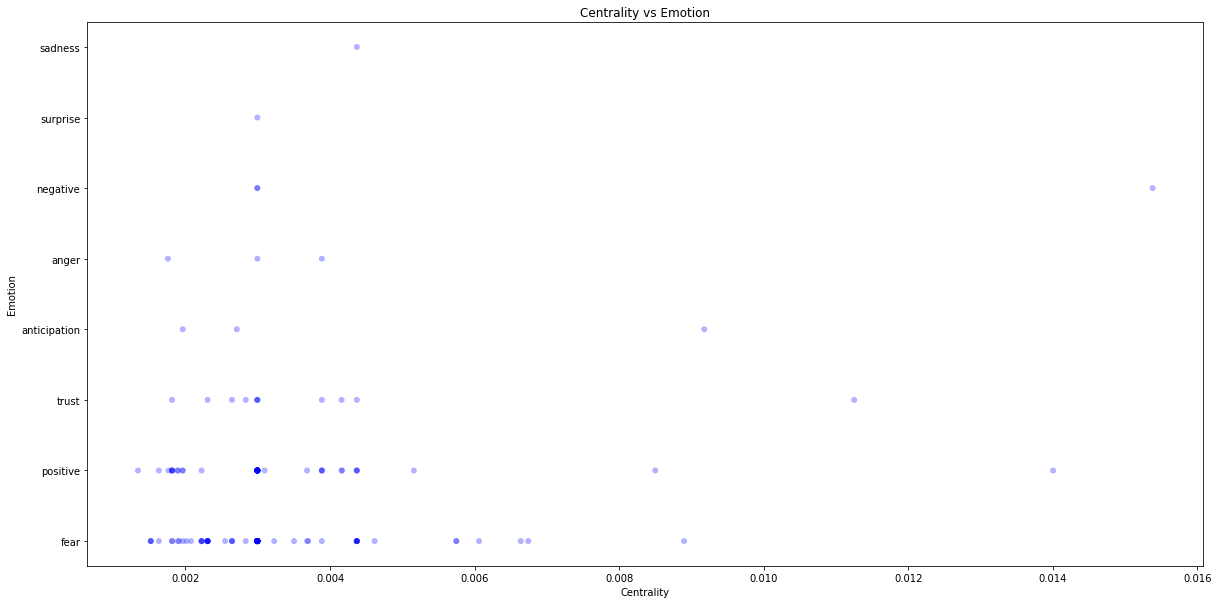

In [ ]:
#Plotting the figure
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.scatter(pageranktop.values(),topemotion ,c='blue', alpha=.3, edgecolors='none')
ax.set_xlabel('Centrality')
ax.set_ylabel('Emotion')
plt.title('Centrality vs Emotion')

Here we cannot really observe any trend between centrality and emotion. This might be due to the fact that centrality has nothing to do with the emotion. Moreover since the hashtag is #video, the emotions can vary alot. There is no fixed emotion with #video. Whereas if the hashtag was #trump, the emotions would mostly be positive or negative and the centrality would also vary. If the tweets were directed directly towards trump, then the centrality of trump would be very high and the negative or positive emotion would be directly associated with centrality.
But here since there are so many emotions, it is hard to have a clear relation between centrality and emotions. If the emotions had been more clear and less variable, then one emotion could be related to centrality. For example if Messi plays well in a match, More positve tweets are related to Barcelona, Messi, Argentina etc. hence the centrality of messi related nodes would increase and also the positive emotions, hence that will have a relation b/w centrality and emotion. But not in this case where the emotions vary alot and there is no clear emotion.